# Time Series Prediction

Due to the sequential charasteristics of RNNs, they can be used for time series prediction task. A time series is a series of data points indexed in time order. One example of time series is stock prices at regular intervals of time (hourly, daily, etc.). There have been many attempts to forecast stocks market, some belive predicting the market is impossible because of its total random behaviour, while some (mainly stocks technical analysts) belive not 100% accurate, but it is partly predictable, as they say "history repeats itself" (this phrase indicates that there might be some repetitive patterns in market's behaviour). 

In this practice, we are going to discover ourselves whether it is possible or not, whether we are going to be rich or broke :)  

## Stocks Prediction Using LSTM

LSTMs can be used for modeling time series (such as stocks market) as they are capable of remembering past information. Stock price prediction is similar to any other machine learning problem where we are given a set of features and we have to predict a corresponding value, in this case our features are the closing prices of stocks in the past 60 days and we want to predict next closing price. We can use LSTM to model this 60 days sequence by a hidden state as we do in all other sequence modeling problems:

<p align="center"><img src="https://drive.google.com/thumbnail?id=1hml7fG9_GKDLH1068Wq_Jk-D09FtQk17&sz=w1000-h1000" width="800"/></p>

</br>

We are going to solve these two following problems:
* 1 . Predicting the exact price at time $T_i$ given prices at times $T_{i-60}$, ..., $T_{i-1}$

* 2 . A simplified version of previous problem, predicting the direction of price at time $T_i$ (whether it is increasing or decreasing) given prices at times $T_{i-60}$, ..., $T_{i-1}$


So the first task is a regression and the second one is a classification problem.


### 1. Predicting The Exact Price

**DATA:**

The data that we are going to use are from ***Yahoo Finance*** (a place to look up stock market data and company news). We can accsess historical market data from *Yahoo Finance* using python ***yfinance*** module. 

Let's install *yfinance* module first:

In [22]:
from IPython.display import clear_output

!pip install yfinance

clear_output()

For training our algorithm, we will be using the Apple stock prices from 1st January 2014 to 1st January 2018. In order to evaluate the performance of the algorithm, we will be using the prices from 1st January 2018 to 1st January 2019. 

Let's get the data and visualise it:

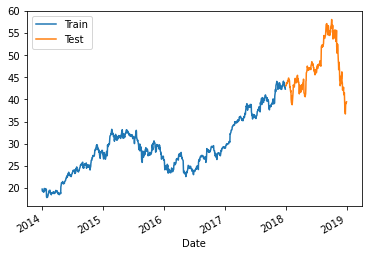

In [23]:

import matplotlib.pyplot as plt
import yfinance as yf  

train_data = yf.download('AAPL','2014-01-01','2018-01-01')
test_data = yf.download('AAPL','2018-01-01','2019-01-01')

train_data.Close.plot()
test_data.Close.plot()
plt.legend (["Train", "Test"])

clear_output()
plt.show()

As you can see our data is just a sequence of numbers ordered by time. 

In order to normalize our data we scale them between 0 and 1: 

In [24]:
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
scaler = MinMaxScaler(feature_range = (0, 1)).fit(train_data.Close.values.reshape(-1, 1))

train_scaled = scaler.transform(train_data.Close.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.Close.values.reshape(-1, 1))  

print ("train_scaled.shape :", train_scaled.shape)
print ("test_scaled.shape :", test_scaled.shape)

train_scaled.shape : (1007, 1)
test_scaled.shape : (251, 1)


Now we create our input output pairs from our sequence:

In [4]:
train_features_set = []  
train_labels = []  
for i in range(60, train_scaled.shape[0]):  
    train_features_set.append(train_scaled[i-60:i, 0])
    train_labels.append(train_scaled[i, 0])

We need to convert these lists to the numpy arrays before we can use them for training. Then in order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. The first dimension is the number of records or rows in the dataset which is 1007 in our case. The second dimension is the number of time steps which is 60 while the last dimension is the number of indicators. Since we are only using one feature, i.e Closing price, the number of indicators will be one.

In [5]:
train_features_set, train_labels = np.array(train_features_set), np.array(train_labels)
train_features_set = np.reshape(train_features_set, (train_features_set.shape[0], train_features_set.shape[1], 1))

Now let's create and train a simple model, our model has a stack of 4 lstm layers and a single output layer: 

In [6]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))

# we have a single output so this layer has 1 unit
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(train_features_set, train_labels, epochs = 100, batch_size = 30)

clear_output()

Now we create our test features set similar to what we did with our training set:

In [7]:
test_scaled = scaler.transform(test_data.Close.values.reshape(-1, 1))  

test_features_set = []  
for i in range(60, test_scaled.shape[0]):  
    test_features_set.append(test_scaled[i-60:i, 0])
    
test_features_set = np.array(test_features_set)  
test_features_set = np.reshape(test_features_set, (test_features_set.shape[0], test_features_set.shape[1], 1))

And finaly let's see the results:

6/6 [==============================] - 1s 7ms/step


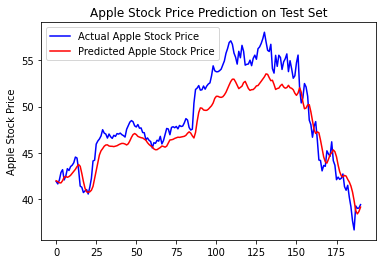

In [8]:
predictions = model.predict(test_features_set)
predictions = scaler.inverse_transform(predictions)  
  
plt.plot(test_data.Close.values[60:], color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction on Test Set')    
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()

* At first sight, it seems the predictions are following  pretty well the actual trend. What do you think about the result? Are you willing to risk using this predictions in real world? 

$\color{red}{\text{Write you answer here}}$

No, Despite the heavily popularized approach of attempted stock price prediction with LSTMs, such a thing is unfortunately entirely mythical. As you can see above, the model can predict the trend of the actual stock prices very closely, but the accuracy of the model can be enhanced by training with more data and increasing the LSTM layers

Stock prices are essentially random walks, with each subsequent future price being independent from the last. It's not that LSTMs are a weak model without enough predictive power— they can be incredibly strong time series and sequential data predictors — rather, it is the fact that there is nothing that is predictable to begin with. Randomness by its very definition can not be reliably predicted. Therefore, attempting to learn sequential order dependance on data that itself has no sequential order dependance is, obviously, impossible.

Regardless, previous prices alone do not provide enough information anyway. Stock markets are incredibly complex and intricate, any occasional non-random changes influenced by hundreds of variables in the real world can not possibly be accounted for by setting up the prediction problem as just using previous closing prices alone.

### 2. Predicting The Direction

Previous model can be evaluated  just visually. We can evaluate a classification task using its special measures (such as f-score or accuracy) much better than a regression task. So in order to finaly decide whether the stocks market prediction is practical or not, we define this second task.

Implement a model similar to previous one, this time the task is to predict whether the price is going to increase or decrease (output will be either 1 or 0 respectively) at time $T_i$ given prices at times $T_{i-60}$, ..., $T_{i-1}$ :

In [25]:
########################################
#     Put your implementation here     #
########################################
# First we are going to make input output pairs for classification task 
#in order to have binary targets 0 for dec and 1 for increasing order
train_features_set = []  
train_labels = []  
for i in range(60, train_scaled.shape[0]):  
    train_features_set.append(train_scaled[i-60:i, 0])
    if train_scaled[i,0] >= train_scaled[i-1,0]:
        train_labels.append(1)
    else:
        train_labels.append(0)

train_features_set, train_labels = np.array(train_features_set), np.array(train_labels)
train_features_set = np.reshape(train_features_set, (train_features_set.shape[0], train_features_set.shape[1], 1))


classification_model = Sequential()
classification_model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features_set.shape[1], 1)))
classification_model.add(Dropout(0.2))

classification_model.add(LSTM(units=50, return_sequences=True))  
classification_model.add(Dropout(0.2))

classification_model.add(LSTM(units=50, return_sequences=True))  
classification_model.add(Dropout(0.2))

classification_model.add(LSTM(units=50))  
classification_model.add(Dropout(0.2))

#here we add sigmoid activation function to the binary classifiers dense layer
classification_model.add(Dense(units = 1,activation='sigmoid'))
#change the loss to binray cross entropy for classification
classification_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

classification_model.fit(train_features_set, train_labels, epochs = 100, batch_size = 30)

clear_output()

Evaluate your trained model using the test set and report accuracy and f1-score your model archived: 

In [26]:
########################################
#     Put your implementation here     #
########################################
test_scaled = scaler.transform(test_data.Close.values.reshape(-1, 1))  

test_features_set = []  
test_targets = []
for i in range(60, test_scaled.shape[0]):  
    test_features_set.append(test_scaled[i-60:i, 0])
    if test_scaled[i,0] >= test_scaled[i-1,0]:
        test_targets.append(1)
    else:
        test_targets.append(0)

test_features_set = np.array(test_features_set)  
test_features_set = np.reshape(test_features_set, (test_features_set.shape[0], test_features_set.shape[1], 1))
test_targets = np.array(test_targets)

In [27]:
model.evaluate(test_features_set,  test_targets, verbose=3)
from sklearn.metrics import classification_report

y_pred = model.predict(test_features_set, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_targets, y_pred_bool))

3/3 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        89
           1       0.00      0.00      0.00       102

    accuracy                           0.47       191
   macro avg       0.23      0.50      0.32       191
weighted avg       0.22      0.47      0.30       191



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Do not worry if your results are not as promising as before :))
* Comparing new results with previuos ones, why do you think this happens? Doesn't this task supposed to be an easier version of the previous one (if you are able to predict the actual price, you are already able to predict the direction of price trend)? Explain your toughts:


$\color{red}{\text{Write you answer here}}$

For regression task the model is trained to predict the next value based on 60 time steps before.In other words, the target is based on those 60 time steps, but for classification as we made the targets based on the change on just the last two time steps maybe it does not capture the trend precisely. Maybe it is better to have bigger window to model the trend. Thus, applying this nonlinear operation to get targets makes it hard for model to perform well.

* Intuitively explain what kind of properties do you think a time series need to have in order to be predictable? 

$\color{red}{\text{Write you answer here}}$

Some properties that are desirable are as follow:

**Autocorrelation**
It is a representation of the degree of similarity between the time series and a lagged version of itself. High autocorrelation values mean that the future is strongly correlated to the past and maybe more predictable.

**Stationarity**
A key idea in time series analysis is that of stationarity. Stationarity is considered as an important precondition for the analysis of the correlational structure in the time series. A time series is considered stationary if its behavior does not change over time. This means, for example, that the values always tend to vary about the same level and that their variability is constant over time. Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).
Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

**Seasonality**
meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on.
